In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from bs4 import BeautifulSoup
import plotly.express as px
from PIL import Image

In [2]:
df = pd.read_csv('C:/Users/97252/Desktop/AI\ML/job ads/Dataset.csv')
pd.set_option('display.max_columns', None)
df.head()

title            location department  \
0                           Marketing Intern    US, NY, New York  Marketing   
1  Customer Service - Cloud Video Production      NZ, , Auckland    Success   
2    Commissioning Machinery Assistant (CMA)       US, IA, Wever        NaN   
3          Account Executive - Washington DC  US, DC, Washington      Sales   
4                        Bill Review Manager  US, FL, Fort Worth        NaN   

  salary_range                                    company_profile  \
0          NaN  <h3>We're Food52, and we've created a groundbr...   
1          NaN  <h3>90 Seconds, the worlds Cloud Video Product...   
2          NaN  <h3></h3>\r\n<p>Valor Services provides Workfo...   
3          NaN  <p>Our passion for improving quality of life t...   
4          NaN  <p>SpotSource Solutions LLC is a Global Human ...   

                                         description  \
0  <p>Food52, a fast-growing, James Beard Award-w...   
1  <p>Organised - Focused - Vibrant - Awesome!<br...   
2  <p>Our client, located in Houston, is actively...   
3  <p><b>THE COMPANY: ESRI – Environmental System...   
4  <p><b>JOB TITLE:</b> Itemization Review Manage...   

                                        requirements  \
0  <ul>\r\n<li>Experience with content management...   
1  <p><b>What we expect from you:</b></p>\r\n<p>Y...   
2  <ul>\r\n<li>Implement pre-commissioning and co...   
3  <ul>\r\n<li>\r\n<b>EDUCATION: </b>Bachelor’s o...   
4  <p><b>QUALIFICATIONS:</b></p>\r\n<ul>\r\n<li>R...   

                                            benefits telecommuting  \
0                                                NaN             f   
1  <h3><b>What you will get from us</b></h3>\r\n<...             f   
2                                                NaN             f   
3  <p>Our culture is anything but corporate—we ha...             f   
4                       <p>Full Benefits Offered</p>             f   

  has_company_logo has_questions employment_type required_experience  \
0                t             f           Other          Internship   
1                t             f       Full-time      Not Applicable   
2                t             f             NaN                 NaN   
3                t             f       Full-time    Mid-Senior level   
4                t             t       Full-time    Mid-Senior level   

  required_education                   industry              function  \
0                NaN                        NaN             Marketing   
1                NaN  Marketing and Advertising      Customer Service   
2                NaN                        NaN                   NaN   
3  Bachelor's Degree          Computer Software                 Sales   
4  Bachelor's Degree     Hospital & Health Care  Health Care Provider   

  fraudulent in_balanced_dataset  
0          f                   f  
1          f                   f  
2          f                   f  
3          f                   f  
4          f                   f

In [3]:
# select a balanced set
df = df[df['in_balanced_dataset'] == 't']

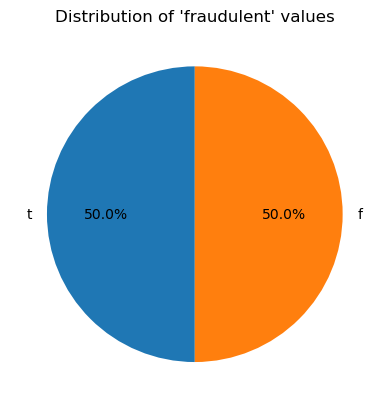

In [4]:
fraudulent_counts = df['fraudulent'].value_counts()
plt.pie(fraudulent_counts, labels=fraudulent_counts.index, autopct=lambda p: '{:.1f}%'.format(p) if p > 0 else '', startangle=90)
plt.title("Distribution of 'fraudulent' values")
plt.show()

In [5]:
df = df.drop(['in_balanced_dataset'], axis=1)

In [6]:
df.count()

title                  900
location               877
department             283
salary_range           168
company_profile        425
description            900
requirements           726
benefits               552
telecommuting          900
has_company_logo       900
has_questions          900
employment_type        638
required_experience    500
required_education     420
industry               581
function               522
fraudulent             900
dtype: int64

In [7]:
df.duplicated().sum()

6

In [8]:
df[df.duplicated()]

title            location  \
17526                       Cruise Staff Wanted *URGENT*      US, TX, DALLAS   
17591  Home Based Payroll Typist/Data Entry Clerks Po...  US, MT, Absarokee    
17612             Urgent Jobs (Part Time Workers Needed)     AU, NSW, Sydney   
17620  Data Entry Admin/Clerical Positions - Work Fro...       US, NE, Omaha   
17742  Data Entry Admin/Clerical Positions - Work Fro...       US, NE, Omaha   
17791  Data Entry Admin/Clerical Positions - Work Fro...       US, NE, Omaha   

      department salary_range company_profile  \
17526        NaN          NaN             NaN   
17591   Clerical          NaN             NaN   
17612        NaN          NaN             NaN   
17620        NaN          NaN             NaN   
17742        NaN          NaN             NaN   
17791        NaN          NaN             NaN   

                                             description  \
17526  <p><b>6* Ultra Luxury American Cruise Company ...   
17591  <p>We have several openings available in this ...   
17612  <p>Urgent Jobs (Part Time Workers Needed)<br>Y...   
17620  <p>ACCEPTING ONLINE APPLICATIONS ONLY</p>\r\n<...   
17742  <p>ACCEPTING ONLINE APPLICATIONS ONLY</p>\r\n<...   
17791  <p>ACCEPTING ONLINE APPLICATIONS ONLY</p>\r\n<...   

                                            requirements  \
17526  <p><b>Certification &amp; Experience:</b> Prev...   
17591  <p>Basic computer and typing skills, ability t...   
17612                 <p>No any experience required.</p>   
17620                                                NaN   
17742                                                NaN   
17791                                                NaN   

                                                benefits telecommuting  \
17526  <p><b>Benefits:</b> On board en suite accommod...             f   
17591  <p>All you need is access to the Internet and ...             f   
17612                                                NaN             f   
17620                                                NaN             f   
17742                                                NaN             f   
17791                                                NaN             f   

      has_company_logo has_questions employment_type required_experience  \
17526                f             t             NaN                 NaN   
17591                f             f             NaN                 NaN   
17612                f             f       Part-time                 NaN   
17620                f             f             NaN                 NaN   
17742                f             f             NaN                 NaN   
17791                f             f             NaN                 NaN   

      required_education                   industry function fraudulent  
17526                NaN  Leisure, Travel & Tourism      NaN          t  
17591                NaN                        NaN      NaN          t  
17612                NaN                        NaN      NaN          t  
17620                NaN                        NaN      NaN          t  
17742                NaN                        NaN      NaN          t  
17791                NaN                        NaN      NaN          t

In [9]:
df.nunique()

title                  700
location               482
department             150
salary_range           112
company_profile        290
description            750
requirements           575
benefits               425
telecommuting            2
has_company_logo         2
has_questions            2
employment_type          5
required_experience      7
required_education      11
industry                79
function                33
fraudulent               2
dtype: int64

# Nulls

In [10]:
#Null values as a percent
(df.isnull().sum() / len(df) * 100).round(2).apply(lambda x: f'{x}%')

title                    0.0%
location                2.56%
department             68.56%
salary_range           81.33%
company_profile        52.78%
description              0.0%
requirements           19.33%
benefits               38.67%
telecommuting            0.0%
has_company_logo         0.0%
has_questions            0.0%
employment_type        29.11%
required_experience    44.44%
required_education     53.33%
industry               35.44%
function                42.0%
fraudulent               0.0%
dtype: object

In [11]:
#replacing t and f with 1 and 0
columns_to_replace = ['telecommuting', 'has_company_logo', 'has_questions', 'fraudulent']
df[columns_to_replace] = df[columns_to_replace].applymap(lambda x: 0 if x == 'f' else (1 if x == 't' else x))

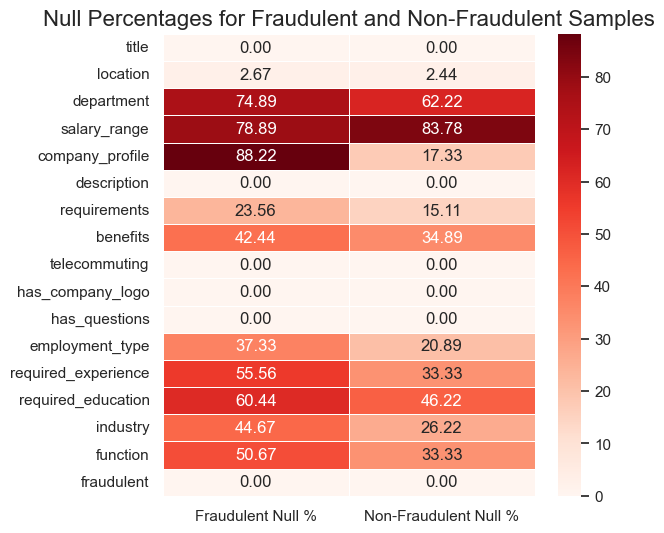

In [12]:
# Separate the DataFrame based on the 'fraudulent' column
fraudulent_df = df[df['fraudulent'] == 1]
non_fraudulent_df = df[df['fraudulent'] == 0]

# Calculate the percentage of null values for each subset
fraudulent_null_percentage = (fraudulent_df.isnull().sum() / len(fraudulent_df) * 100).round(2)
non_fraudulent_null_percentage = (non_fraudulent_df.isnull().sum() / len(non_fraudulent_df) * 100).round(2)

# Concatenate the two DataFrames horizontally
result = pd.concat([fraudulent_null_percentage, non_fraudulent_null_percentage], axis=1)
result.columns = ['Fraudulent Null %', 'Non-Fraudulent Null %']

# Assuming result is the DataFrame with null percentages
sns.set(style="whitegrid")
plt.figure(figsize=(6, 6))

# Create a heatmap
sns.heatmap(result.astype(float), annot=True, cmap="Reds", fmt=".2f", linewidths=.5)

plt.title("Null Percentages for Fraudulent and Non-Fraudulent Samples", fontsize=16)
plt.show()

In [13]:
#Due to the percentage of missing values
df = df.drop(['salary_range'], axis=1)
df = df.drop(['department'], axis=1)
#Due the difference in the percentage of missing values between fraudulent and non fraudulent, 
#I will not delete the company profile column

# Word clouds for title

In [14]:
fraudulent_titles = df[df['fraudulent'] == 1]['title']
non_fraudulent_titles = df[df['fraudulent'] == 0]['title']

fraudulent_words = []
non_fraudulent_words = []

for title in fraudulent_titles:
    words = word_tokenize(title.lower())  # Tokenize and lowercase words
    fraudulent_words.extend(words)

for title in non_fraudulent_titles:
    words = word_tokenize(title.lower())
    non_fraudulent_words.extend(words)

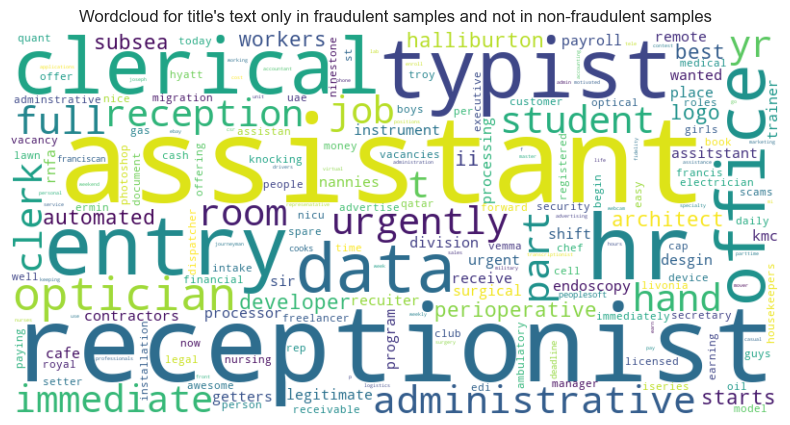

In [15]:
# Step 2: Calculate words that appear in fraudulent samples but not in non-fraudulent samples
fraudulent_unique_words = set(fraudulent_words) - set(non_fraudulent_words)

# Step 3: Create a word cloud from the filtered words
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(fraudulent_unique_words))

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Wordcloud for title's text only in fraudulent samples and not in non-fraudulent samples")
plt.axis('off')
plt.show()

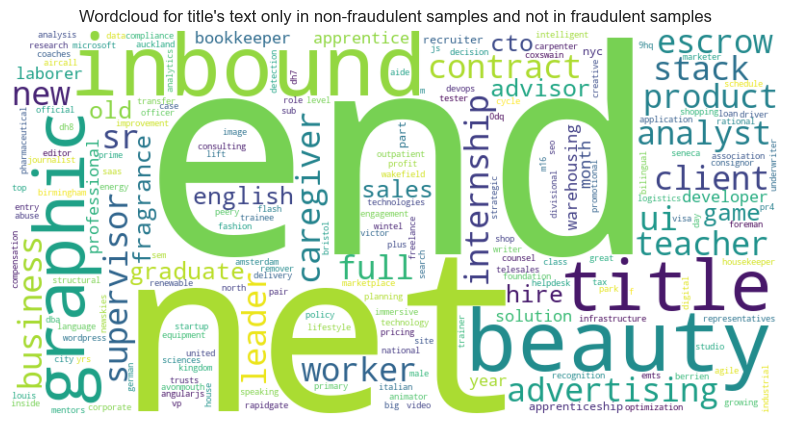

In [16]:
# Step 2: Calculate words that appear in non-fraudulent samples but not in fraudulent samples
non_fraudulent_unique_words = set(non_fraudulent_words) - set(fraudulent_words)

# Step 3: Create a word cloud from the filtered words
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(non_fraudulent_unique_words))

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Wordcloud for title's text only in non-fraudulent samples and not in fraudulent samples")
plt.axis('off')
plt.show()

# Location

In [17]:
def extractComponent(index, value):
    if isinstance(value, str):
        items = [item.strip() for item in value.split(',')]
        return np.nan if len(items) <= index or len(items[index]) == 0 else items[index]
    else:
        return np.nan

In [18]:
# break location into country state and city
df['country'] = df['location'].apply(lambda x: extractComponent(0, x))
df['state'] = df['location'].apply(lambda x: extractComponent(1, x))
df['city'] = df['location'].apply(lambda x: extractComponent(2, x))
df = df.drop(['location'], axis=1)

In [19]:
df_location = df.loc[:, ['country', 'state', 'city']]
df_location.head()

country state          city
144      NaN   NaN           NaN
180       PK    SD       Karachi
493       US    CA   Los Angeles
1152      US    MI         FLINT
1297      US    NY  Port Chester

In [20]:
import pycountry

# Create a dictionary to map two-letter codes to full country names
country_mapping = {country.alpha_2: country.name for country in pycountry.countries}

# Replace two-letter codes with full country names
df['country'] = df['country'].replace(country_mapping)

In [21]:
# Create a new DataFrame with the distribution of fraudulent and non-fraudulent ads by country
fraud_distribution = df.groupby(['country', 'fraudulent']).size().unstack(fill_value=0)

# Add a column for the total count
fraud_distribution['total'] = fraud_distribution.sum(axis=1)

# Calculate the percentage for each category
fraud_distribution['percent_fraudulent'] = ((fraud_distribution[1] / fraud_distribution['total']) * 100).round(2)

# Sort the DataFrame by percent_fraudulent in descending order
fraud_distribution_sorted = fraud_distribution.sort_values(by='percent_fraudulent', ascending=False)

# Create a bar plot with hover information
fig = px.bar(
    fraud_distribution_sorted.reset_index(),
    x='country',
    y='percent_fraudulent',
    labels={'percent_fraudulent': 'Percent Fraudulent'},
    title='Percentage of Fraudulent Job Ads by Country',
    hover_data={'percent_fraudulent': ':.2f', 'total': True}
)

# Customize the layout
fig.update_layout(xaxis_title='Country', yaxis_title='Percent Fraudulent')
fig.show()


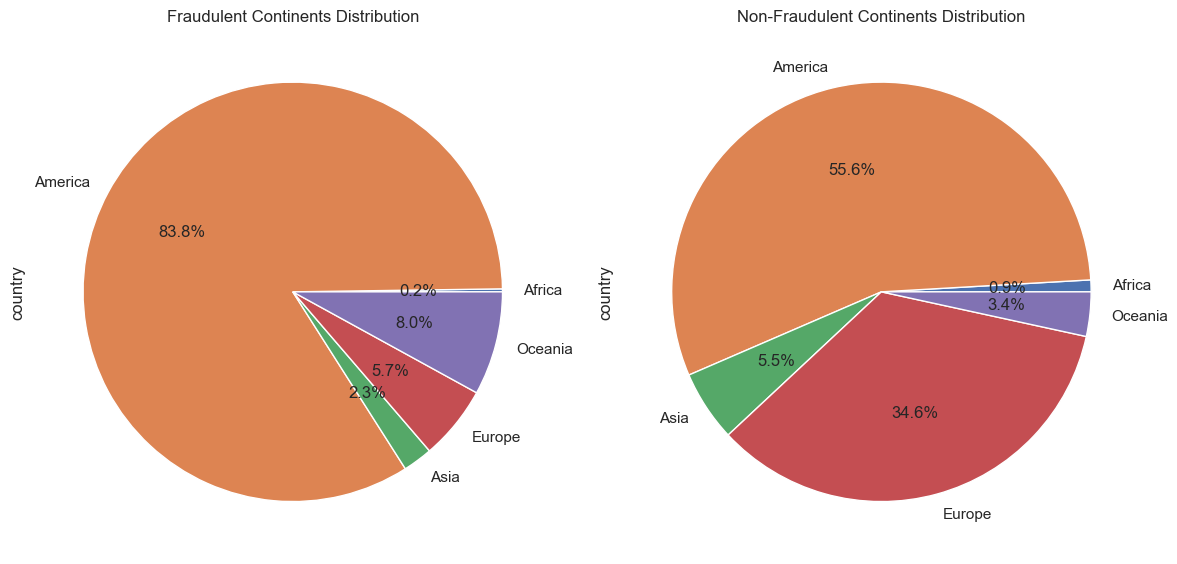

In [22]:
from country_converter import CountryConverter
# Function to get continent from country using country_converter
def get_continent(country_name):
    try:
        country_converter = CountryConverter()
        continent = country_converter.convert(country_name, to='continent')
        if continent:
            return continent
        else:
            return 'Unknown'
    except ValueError:
        return 'Unknown'

# Calculate the percentage for each country
fraudulent_countries = df[df['fraudulent'] == 1]['country']
non_fraudulent_countries = df[df['fraudulent'] == 0]['country']

fraudulent_percentage = (fraudulent_countries.value_counts(dropna=True) / len(fraudulent_countries) * 100).sort_index()
non_fraudulent_percentage = (non_fraudulent_countries.value_counts(dropna=True) / len(non_fraudulent_countries) * 100).sort_index()

# Map countries to continents
fraudulent_percentage.index = fraudulent_percentage.index.map(get_continent)
non_fraudulent_percentage.index = non_fraudulent_percentage.index.map(get_continent)

# Create subplots with two side-by-side pie charts
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot for fraudulent countries with percentages
fraudulent_percentage.groupby(fraudulent_percentage.index).sum().plot(kind='pie', autopct='%1.1f%%', ax=axes[0])
axes[0].set_title('Fraudulent Continents Distribution')

# Plot for non-fraudulent countries with percentages
non_fraudulent_percentage.groupby(non_fraudulent_percentage.index).sum().plot(kind='pie', autopct='%1.1f%%', ax=axes[1])
axes[1].set_title('Non-Fraudulent Continents Distribution')

plt.tight_layout()
plt.show()

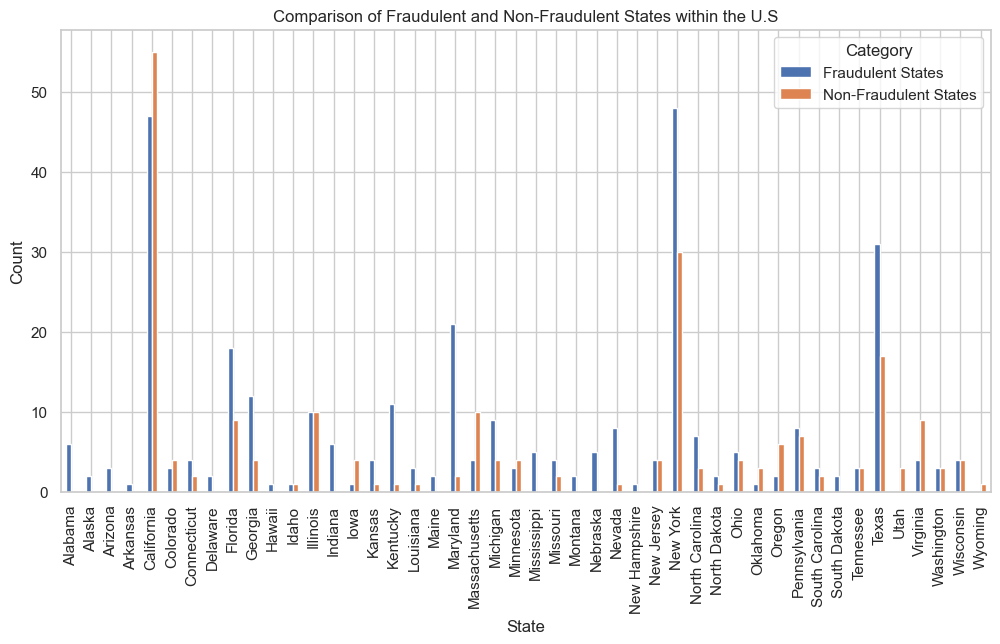

In [23]:
# Filter data for the United States
df_usa = df[df['country'] == 'United States']

# Assuming 'fraudulent' and 'state' are your column names in the filtered DataFrame
fraudulent_states = df_usa[df_usa['fraudulent'] == 1]['state']
non_fraudulent_states = df_usa[df_usa['fraudulent'] == 0]['state']

# Self-made dictionary mapping two-letter codes to state names for all 50 states
state_mapping = {
    'AL': 'Alabama', 'AK': 'Alaska', 'AZ': 'Arizona', 'AR': 'Arkansas', 'CA': 'California',
    'CO': 'Colorado', 'CT': 'Connecticut', 'DE': 'Delaware', 'FL': 'Florida', 'GA': 'Georgia',
    'HI': 'Hawaii', 'ID': 'Idaho', 'IL': 'Illinois', 'IN': 'Indiana', 'IA': 'Iowa',
    'KS': 'Kansas', 'KY': 'Kentucky', 'LA': 'Louisiana', 'ME': 'Maine', 'MD': 'Maryland',
    'MA': 'Massachusetts', 'MI': 'Michigan', 'MN': 'Minnesota', 'MS': 'Mississippi', 'MO': 'Missouri',
    'MT': 'Montana', 'NE': 'Nebraska', 'NV': 'Nevada', 'NH': 'New Hampshire', 'NJ': 'New Jersey',
    'NM': 'New Mexico', 'NY': 'New York', 'NC': 'North Carolina', 'ND': 'North Dakota', 'OH': 'Ohio',
    'OK': 'Oklahoma', 'OR': 'Oregon', 'PA': 'Pennsylvania', 'RI': 'Rhode Island', 'SC': 'South Carolina',
    'SD': 'South Dakota', 'TN': 'Tennessee', 'TX': 'Texas', 'UT': 'Utah', 'VT': 'Vermont',
    'VA': 'Virginia', 'WA': 'Washington', 'WV': 'West Virginia', 'WI': 'Wisconsin', 'WY': 'Wyoming'
}

fraudulent_states = fraudulent_states.map(state_mapping)
non_fraudulent_states = non_fraudulent_states.map(state_mapping)


# Combine counts for fraudulent and non-fraudulent states
combined_counts = pd.DataFrame({
    'Fraudulent States': fraudulent_states.value_counts(dropna=True),
    'Non-Fraudulent States': non_fraudulent_states.value_counts(dropna=True)
})

# Plot combined counts in the same bar plot
combined_counts.sort_index().plot(kind='bar', figsize=(12, 6))
plt.title('Comparison of Fraudulent and Non-Fraudulent States within the U.S')
plt.xlabel('State')
plt.ylabel('Count')
plt.legend(title='Category', loc='upper right')

plt.show()

# Textual variables

In [24]:
# Function to remove HTML tags using BeautifulSoup
def remove_html_and_newline(text):
    if isinstance(text, str):  # Check if the value is a string
        soup = BeautifulSoup(text, 'html.parser')
        cleaned_text = soup.get_text().replace('\n', '')  # Remove \n characters
        return cleaned_text
    else:
        return None


columns_to_clean = ['company_profile', 'description', 'requirements', 'benefits']
for column in columns_to_clean:
    df[column] = df[column].apply(remove_html_and_newline)

# Display the cleaned columns
df_cleaned = df.loc[:, columns_to_clean]
df_cleaned.head()

company_profile                                        description  \
144             None  The group has raised a fund for the purchase o...   
180             None                                    Sales Executive   
493             None  A Newly established company seeks outgoing, fr...   
1152            None  Administrative AssistantEssential Job Responsi...   
1297            None  GraduationSource  is seeking someone to help c...   

                                           requirements         benefits  
144                                                None             None  
180                                     Sales Executive  Sales Executive  
493   Must have good knowledge of Outlook, Microsoft...             None  
1152                                               None             None  
1297  Big Bonus Points if:· You  have NetSuite Exper...             None

In [25]:
def plot_text_length_distribution(df, column):
    # Create subplots with two side-by-side histograms
    fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)

    # Plot for fraudulent samples
    sns.histplot(df[df['fraudulent'] == 1][column].apply(lambda x: len(str(x))), bins=20, kde=True, color='lightcoral', edgecolor='black', ax=axes[0])
    axes[0].set_title(f'Fraudulent - {column} Text Length')
    axes[0].set_xlabel('Text Length')
    axes[0].set_ylabel('Frequency')

    # Plot for non-fraudulent samples
    sns.histplot(df[df['fraudulent'] == 0][column].apply(lambda x: len(str(x))), bins=20, kde=True, color='skyblue', edgecolor='black', ax=axes[1])
    axes[1].set_title(f'Non-Fraudulent - {column} Text Length')
    axes[1].set_xlabel('Text Length')
    axes[1].set_ylabel('Frequency')

    # Adjust layout for better spacing
    plt.tight_layout()

    plt.show()

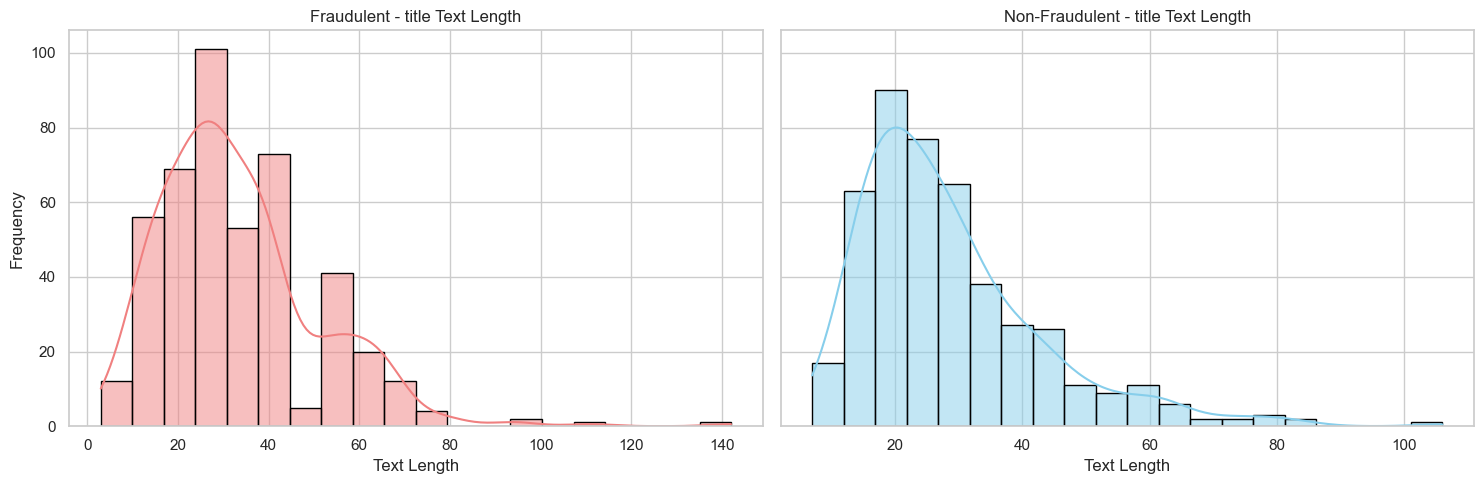

In [26]:
plot_text_length_distribution(df, 'title')

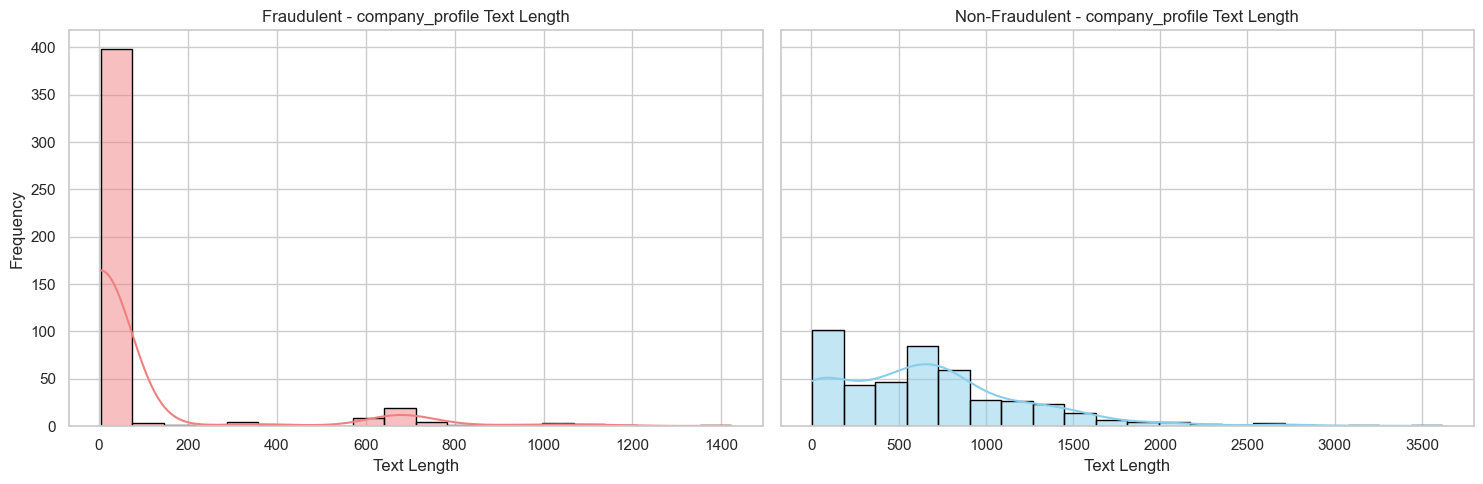

In [27]:
plot_text_length_distribution(df, 'company_profile')

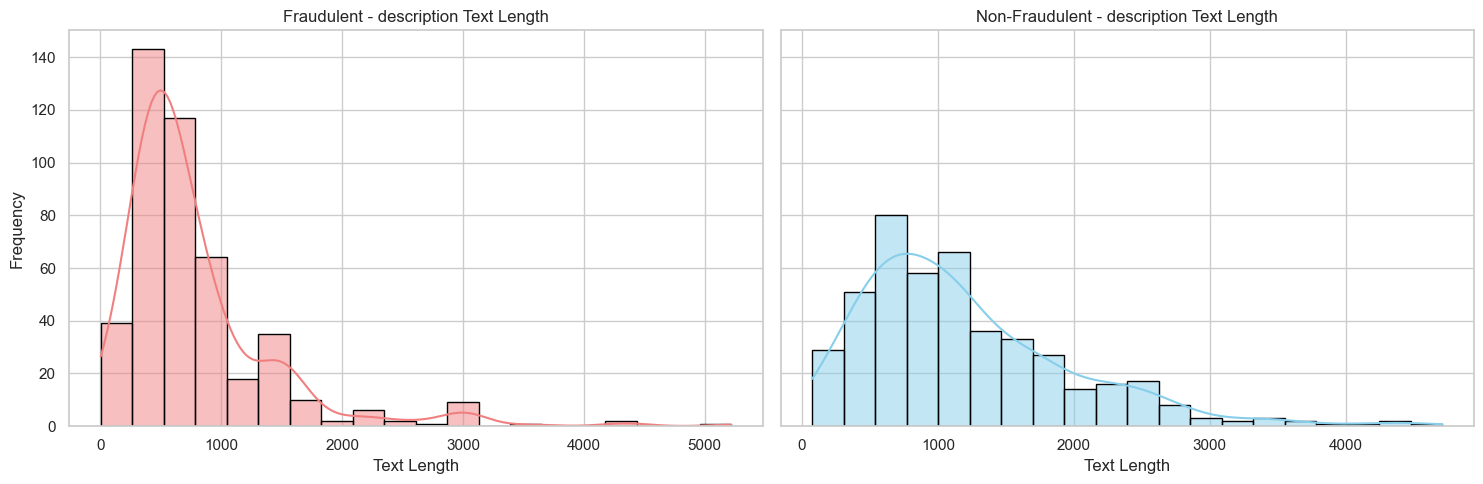

In [28]:
plot_text_length_distribution(df, 'description')

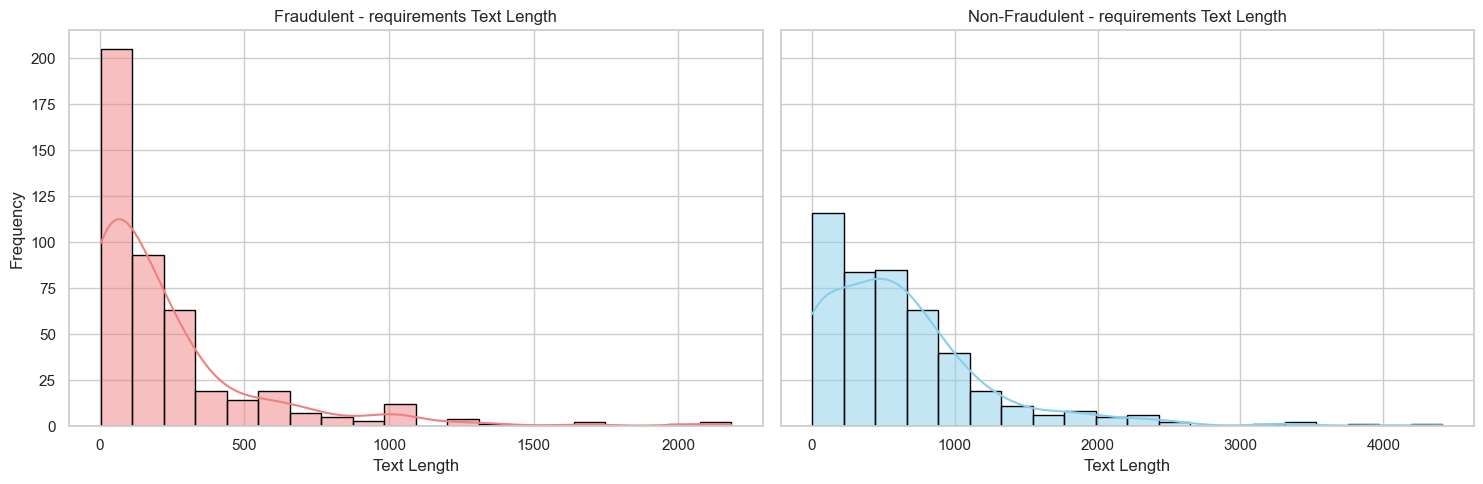

In [29]:
plot_text_length_distribution(df, 'requirements')

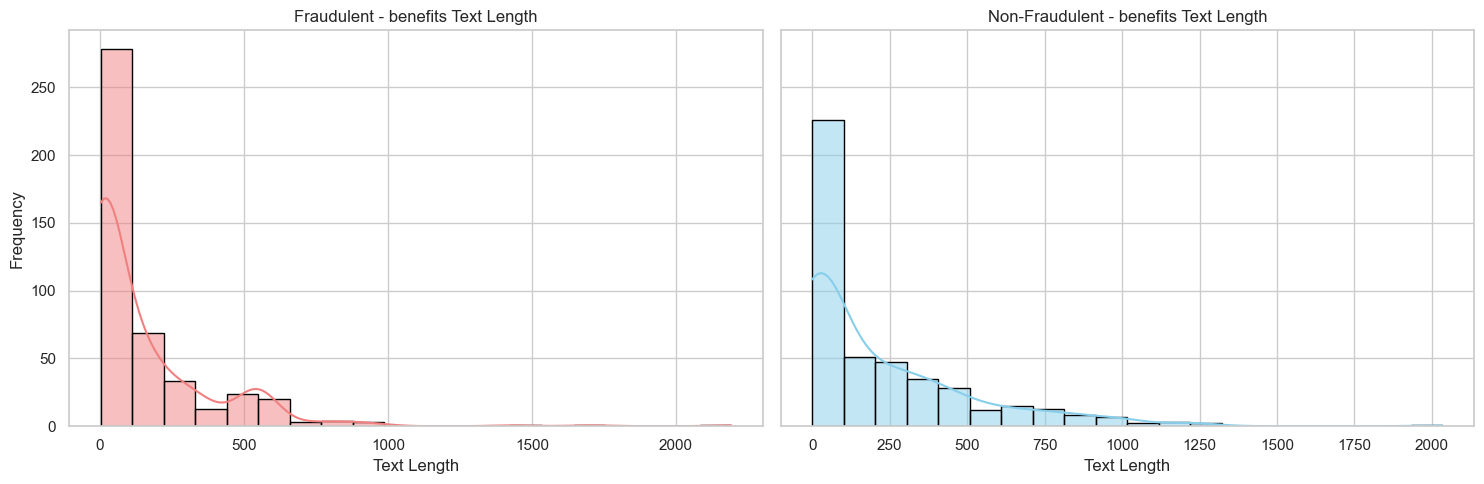

In [30]:
plot_text_length_distribution(df, 'benefits')

# Binary variables 

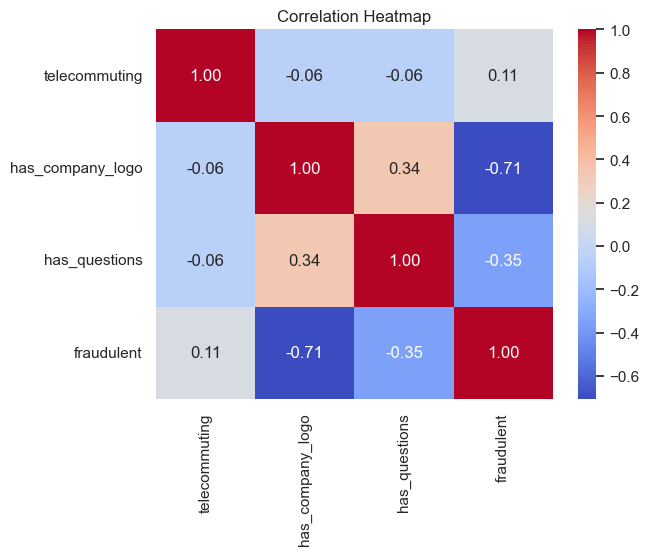

In [31]:
selected_columns = df[['telecommuting', 'has_company_logo', 'has_questions', 'fraudulent']]
correlation_matrix = selected_columns.corr(numeric_only=True)

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

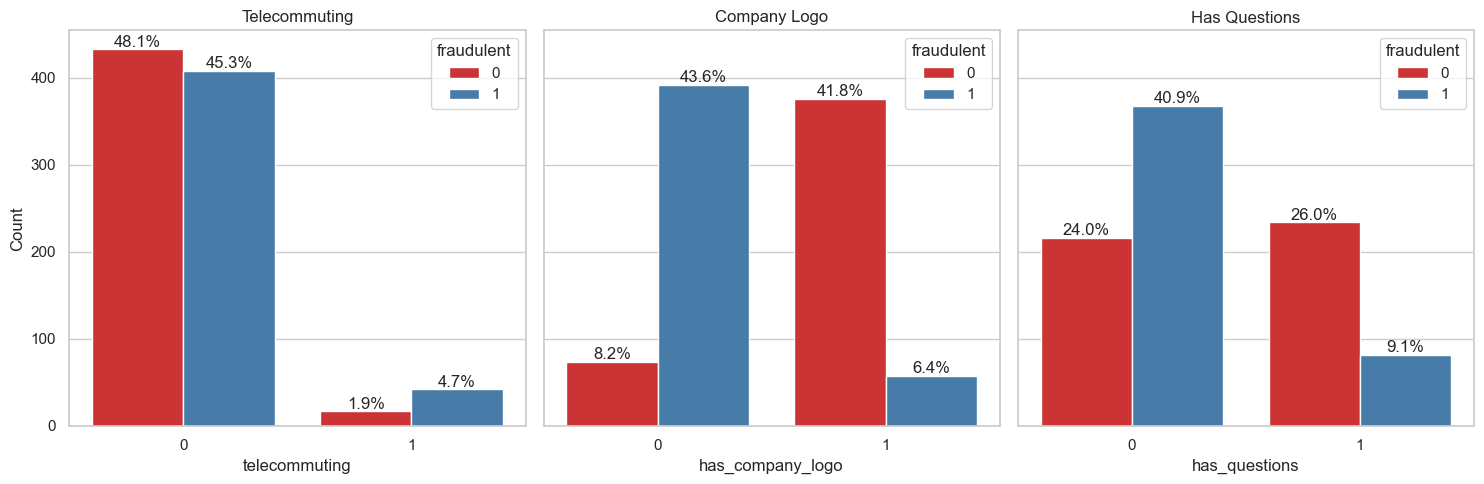

In [32]:
# Set the style of seaborn
sns.set(style="whitegrid")

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5), sharey=True)

# Plot for 'telecommuting'
sns.countplot(x='telecommuting', hue='fraudulent', data=df, ax=axes[0], palette='Set1')
axes[0].set_title('Telecommuting')
axes[0].set_ylabel('Count')
total = float(len(df['telecommuting']))
for p in axes[0].patches:
    height = p.get_height()
    axes[0].text(p.get_x() + p.get_width() / 2, height + 3, f'{height/total:.1%}', ha='center')

# Plot for 'has_company_logo'
sns.countplot(x='has_company_logo', hue='fraudulent', data=df, ax=axes[1], palette='Set1')
axes[1].set_title('Company Logo')
axes[1].set_ylabel('')
total = float(len(df['has_company_logo']))
for p in axes[1].patches:
    height = p.get_height()
    axes[1].text(p.get_x() + p.get_width() / 2, height + 3, f'{height/total:.1%}', ha='center')

# Plot for 'has_questions'
sns.countplot(x='has_questions', hue='fraudulent', data=df, ax=axes[2], palette='Set1')
axes[2].set_title('Has Questions')
axes[2].set_ylabel('')
total = float(len(df['has_questions']))
for p in axes[2].patches:
    height = p.get_height()
    axes[2].text(p.get_x() + p.get_width() / 2, height + 3, f'{height/total:.1%}', ha='center')

# Adjust layout
plt.tight_layout()
plt.show()

# Categorical variables

In [33]:
def plot_distribution(df, column_name):
    # Create subplots with three side-by-side bar plots
    fig, axes = plt.subplots(1, 3, figsize=(15, 7), sharey=True)

    # Plot for overall distribution
    df[column_name].value_counts(dropna=False).sort_index().plot(kind='bar', ax=axes[0])
    axes[0].set_title(f'Overall Distribution - {column_name}')
    axes[0].set_ylabel('Count')

    # Plot for fraudulent samples
    df[df['fraudulent'] == 1][column_name].value_counts(dropna=False).sort_index().plot(kind='bar', ax=axes[1])
    axes[1].set_title(f'Fraudulent Distribution - {column_name}')

    # Plot for non-fraudulent samples
    df[df['fraudulent'] == 0][column_name].value_counts(dropna=False).sort_index().plot(kind='bar', ax=axes[2])
    axes[2].set_title(f'Non-Fraudulent Distribution - {column_name}')

    plt.tight_layout()
    plt.show()

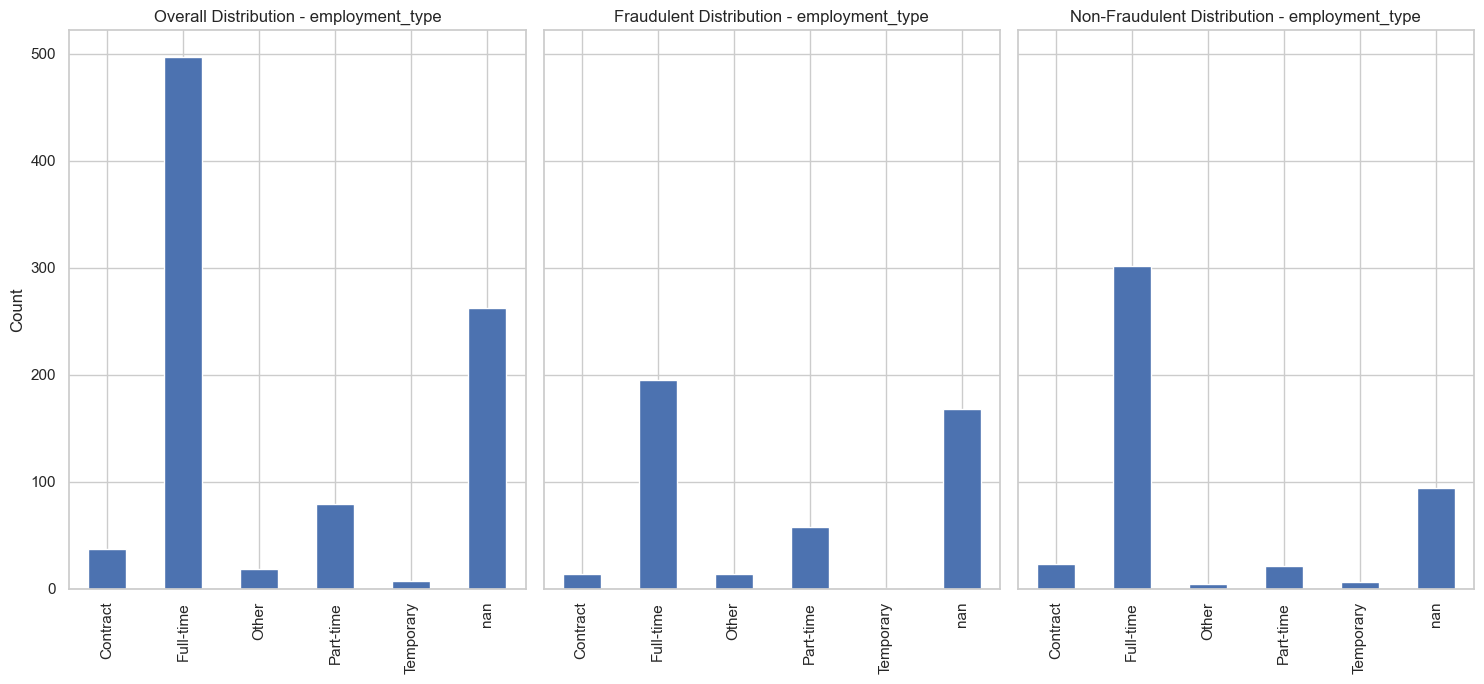

In [34]:
plot_distribution(df, 'employment_type')

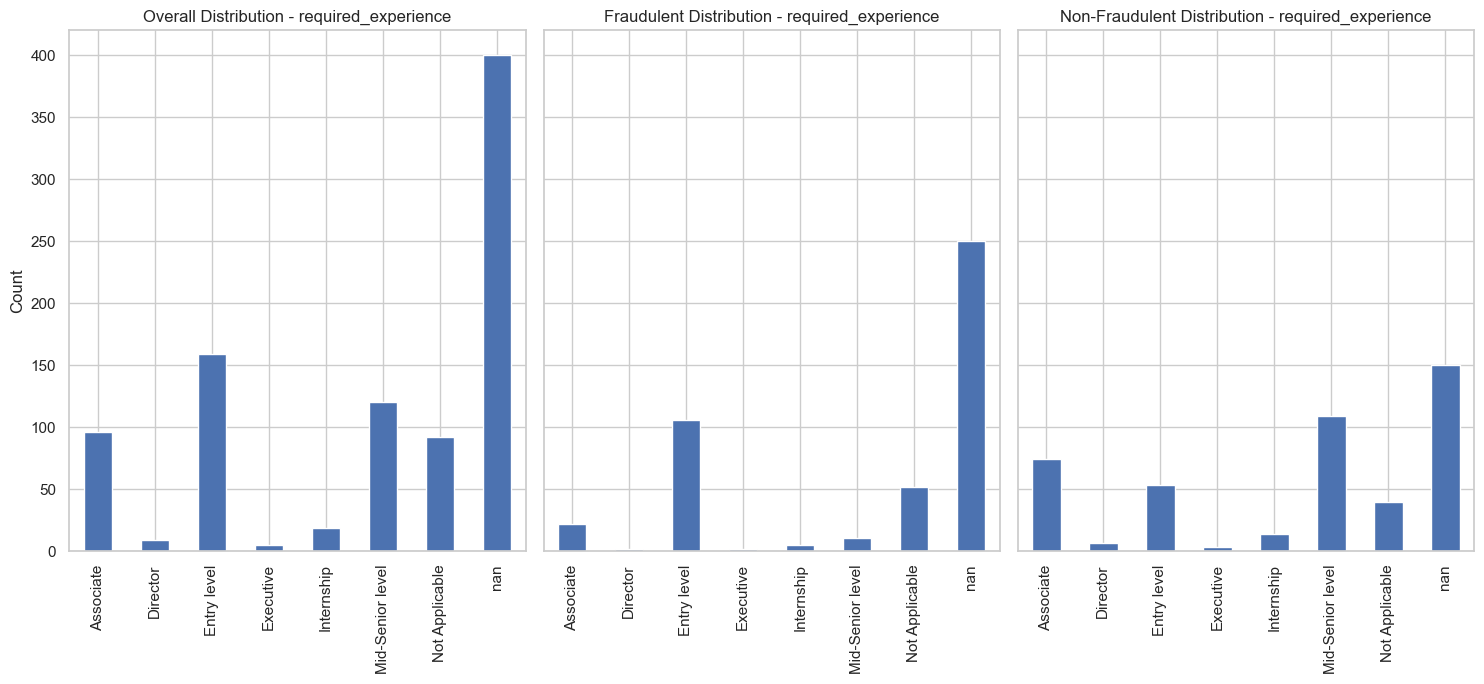

In [35]:
plot_distribution(df, 'required_experience')

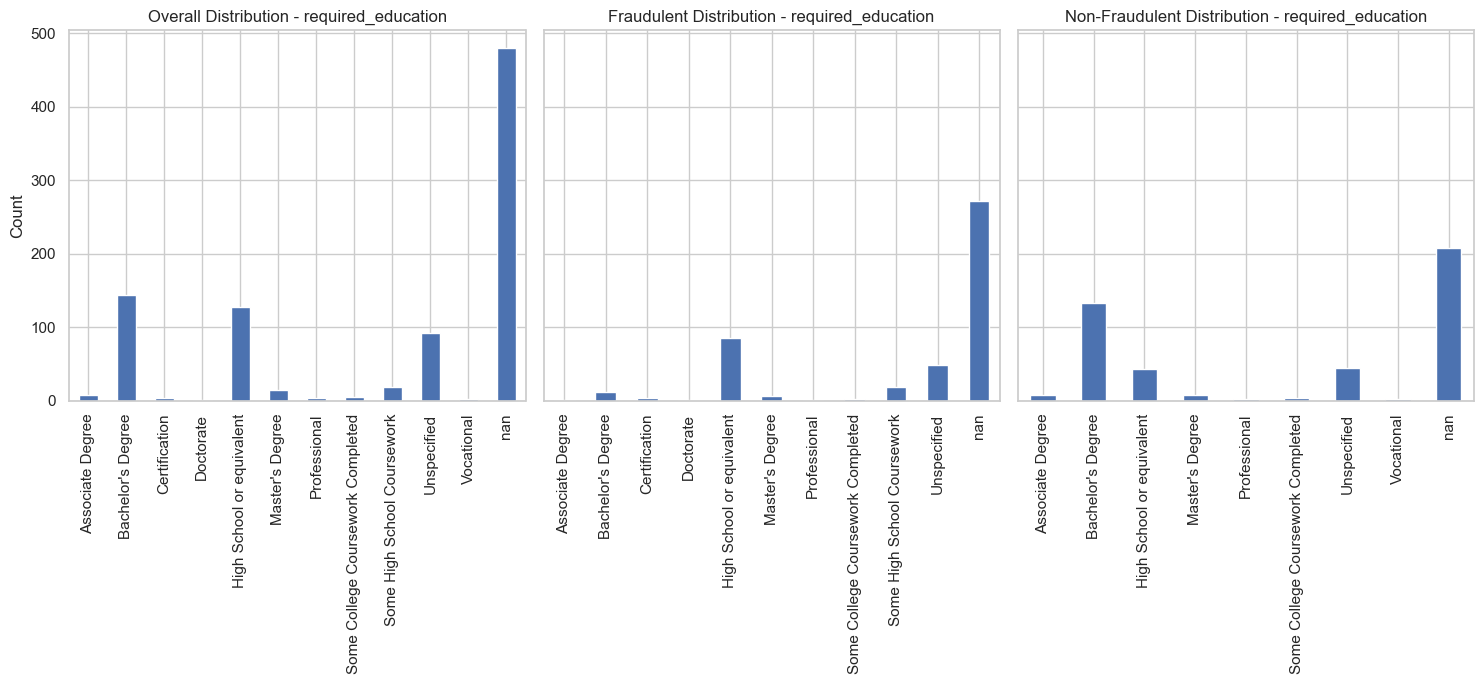

In [36]:
plot_distribution(df, 'required_education')

In [37]:
def plot_distribution_top10(df, column_name):
    # Create subplots with two side-by-side bar plots
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))

    # Plot for fraudulent samples
    fraudulent_counts = df[df['fraudulent'] == 1][column_name].value_counts(dropna=False).nlargest(10)
    fraudulent_percentage = fraudulent_counts / fraudulent_counts.sum() * 100
    fraudulent_counts.plot(kind='barh', ax=axes[0])

    # Add percentage labels on each bar for fraudulent samples
    for i, v in enumerate(fraudulent_percentage):
        axes[0].text(v + 1, i, f'{v:.2f}%', va='center')

    axes[0].set_title(f'Fraudulent Distribution - Top 10 {column_name}')

    # Plot for non-fraudulent samples
    non_fraudulent_counts = df[df['fraudulent'] == 0][column_name].value_counts(dropna=False).nlargest(10)
    non_fraudulent_percentage = non_fraudulent_counts / non_fraudulent_counts.sum() * 100
    non_fraudulent_counts.plot(kind='barh', ax=axes[1])

    # Add percentage labels on each bar for non-fraudulent samples
    for i, v in enumerate(non_fraudulent_percentage):
        axes[1].text(v + 1, i, f'{v:.2f}%', va='center')

    axes[1].set_title(f'Non-Fraudulent Distribution - Top 10 {column_name}')

    plt.tight_layout()
    plt.show()

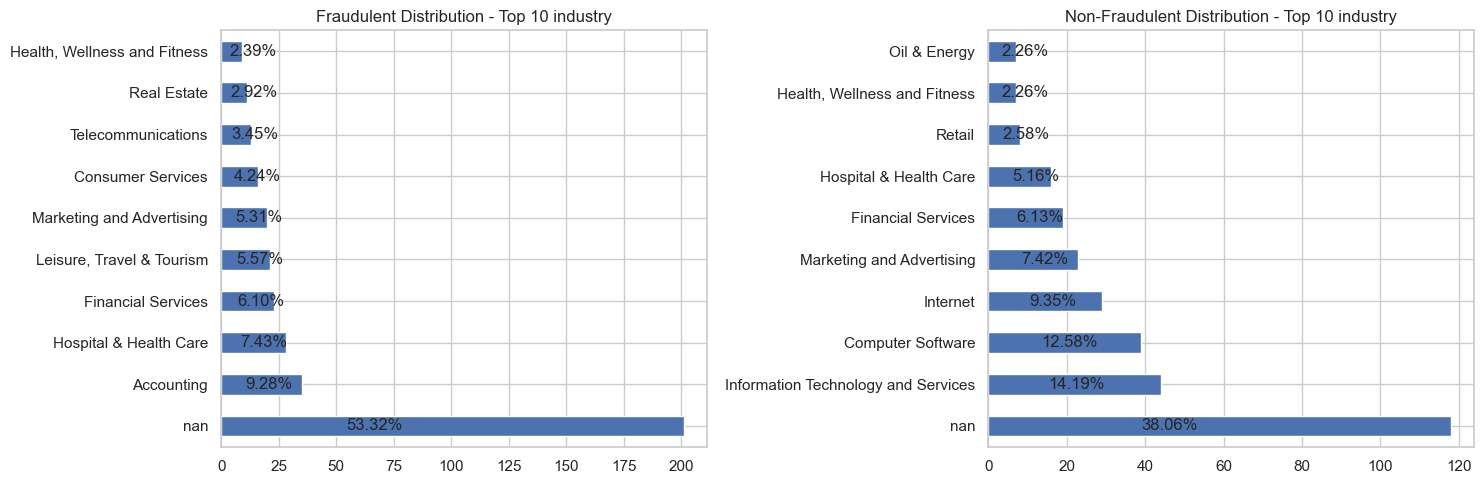

In [38]:
plot_distribution_top10(df, 'industry')

In [39]:
def print_unique_values_by_fraudulent(df, column_name):
    fraudulent_values = df[df['fraudulent'] == 1][column_name]
    non_fraudulent_values = df[df['fraudulent'] == 0][column_name]

    only_fraudulent_values = set(fraudulent_values) - set(non_fraudulent_values)

    # Filter the DataFrame to include only rows where the column is in only_fraudulent_values
    filtered_fraudulent_df = df[df[column_name].isin(only_fraudulent_values)]

    # Group by the column and count occurrences
    fraudulent_counts = filtered_fraudulent_df[column_name].value_counts()

    # Create a DataFrame with the values and their counts
    fraudulent_result_df = pd.DataFrame({column_name: fraudulent_counts.index, 'Count': fraudulent_counts.values})

    return fraudulent_result_df

In [40]:
def print_unique_values_by_non_fraudulent(df, column_name):
    fraudulent_values = df[df['fraudulent'] == 1][column_name]
    non_fraudulent_values = df[df['fraudulent'] == 0][column_name]

    only_non_fraudulent_values = set(non_fraudulent_values) - set(fraudulent_values)

    # Filter the DataFrame to include only rows where the column is in only_non_fraudulent_values
    filtered_non_fraudulent_df = df[df[column_name].isin(only_non_fraudulent_values)]

    # Group by the column and count occurrences
    non_fraudulent_counts = filtered_non_fraudulent_df[column_name].value_counts()

    # Create a DataFrame with the values and their counts
    non_fraudulent_result_df = pd.DataFrame({column_name: non_fraudulent_counts.index, 'Count': non_fraudulent_counts.values})
    
    return non_fraudulent_result_df

In [41]:
print("Values only in fraudulent for industry:")
fraudulent_industies_list = print_unique_values_by_fraudulent(df, 'industry')
fraudulent_industies_list

Values only in fraudulent for industry:


industry  Count
0                            Design      3
1                         Insurance      2
2               Computer Networking      2
3                         Animation      2
4                   Market Research      1
5                   Medical Devices      1
6            Outsourcing/Offshoring      1
7                 Civil Engineering      1
8                          Ranching      1
9                   Defense & Space      1
10  Business Supplies and Equipment      1
11                 Executive Office      1

In [42]:
print("Values only in non-fraudulent for industry:")
non_fraudulent_industies_list = print_unique_values_by_non_fraudulent(df, 'industry')
non_fraudulent_industies_list

Values only in non-fraudulent for industry:


industry  Count
0                               Internet     29
1                         Computer Games      5
2                            Warehousing      5
3             Logistics and Supply Chain      5
4                 Environmental Services      4
5                   Consumer Electronics      3
6                   Education Management      3
7                         Legal Services      2
8    Public Relations and Communications      2
9                               Research      2
10     Nonprofit Organization Management      2
11                    Gambling & Casinos      2
12   International Trade and Development      2
13                             Wholesale      1
14                       Pharmaceuticals      1
15                   Program Development      1
16                             Furniture      1
17      Venture Capital & Private Equity      1
18                          Philanthropy      1
19                      Food & Beverages      1
20                       Mining & Metals      1
21                   Writing and Editing      1
22                        Consumer Goods      1
23                              Plastics      1
24          Individual & Family Services      1
25      Professional Training & Coaching      1
26                             Utilities      1
27  Mechanical or Industrial Engineering      1
28                           Restaurants      1
29                         Public Policy      1
30                            Publishing      1
31                            Veterinary      1
32      Transportation/Trucking/Railroad      1

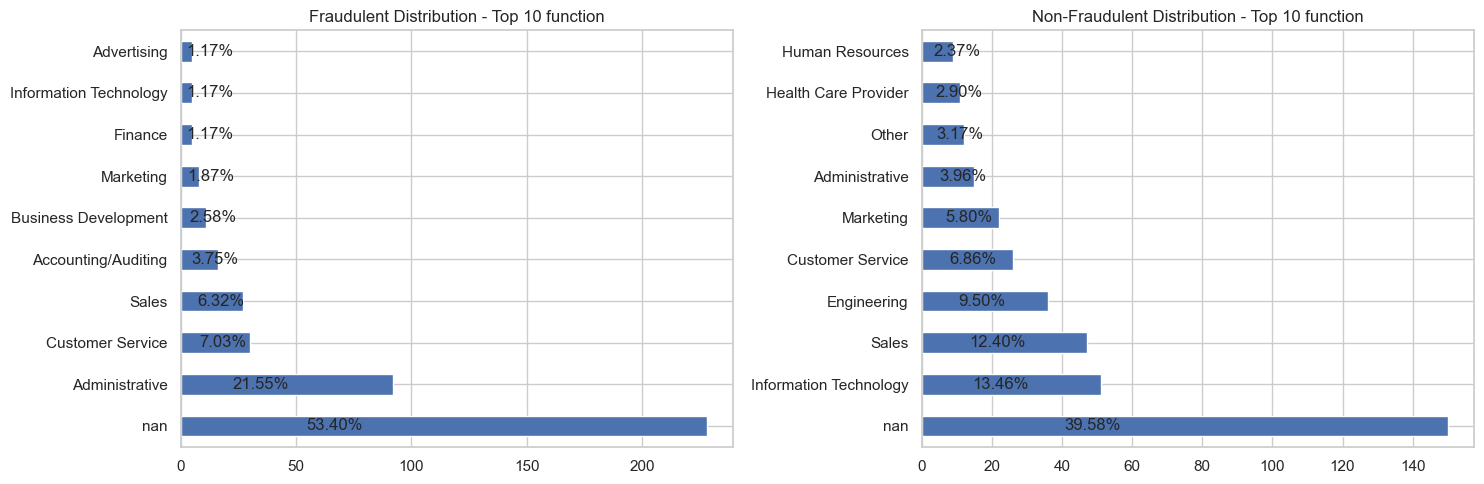

In [43]:
plot_distribution_top10(df, 'function')

In [44]:
print("Values only in fraudulent for function:")
fraudulent_functions_list = print_unique_values_by_fraudulent(df, 'function')
fraudulent_functions_list

Values only in fraudulent for function:


function  Count
0  Data Analyst      3

In [45]:
print("Values only in non-fraudulent for function:")
non_fraudulent_functions_list = print_unique_values_by_non_fraudulent(df, 'function')
non_fraudulent_functions_list

Values only in non-fraudulent for function:


function  Count
0           Management      6
1             Research      4
2     Public Relations      4
3   Product Management      3
4      Writing/Editing      3
5     Business Analyst      3
6         Supply Chain      3
7    Quality Assurance      3
8                Legal      1
9         Distribution      1
10       Manufacturing      1
11          Production      1